<a href="https://colab.research.google.com/github/DayneTes/WebProject/blob/main/LA_Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Housing Data](https://data.lacity.org/Housing-and-Real-Estate/LAHD-Affordable-Housing-Projects-List-2003-to-Pres/mymu-zi3s/data_preview)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('LAHD.csv')
df.head(10)

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.26584,34.05235,POINT (-118.26584 34.05235)
1,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
2,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2024-08-05T00:00:00.000,-118.25740,34.01115,POINT (-118.2574 34.01115)
3,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2024-08-05T00:00:00.000,-118.33139,33.97355,POINT (-118.33139 33.97355)
4,5153030026,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,...,THE JOHN STEWART COMPANY,(213) 482-9122,click here (http://hcidapp.lacity.org/mpphotos...,95.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109452,2024-08-05T00:00:00.000,-118.26086,34.06173,POINT (-118.26086 34.06173)
5,5127029049,18-125459,LA PRENSA LIBRE- 9% (FKA WASHINGTON/ LA),In-Service,NEW CONSTRUCTION,"200 E WASHINGTON BLVD Los Angeles, CA 90015",9,1,UNIVERSITY PARK,42,...,"FPI MANAGEMENT, INC.",(916) 357-5312 x434,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,C-137346,2024-08-05T00:00:00.000,-118.26348,34.03031,POINT (-118.26348 34.03031)
6,5037025018,14-121612,KING 1101,In-Service,NEW CONSTRUCTION,"1107 W MARTIN LUTHER KING BLVD Los Angeles, C...",8,1,EXPOSITION PARK,26,...,"LEVINE MANAGEMENT GROUP, INC",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,85.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-127889,2024-08-05T00:00:00.000,-118.29437,34.01106,POINT (-118.29437 34.01106)
7,5119011019,13-120909,ROBERTA STEPHENS VILLAS I & II (RECAP) (SITE 2),In-Service,ACQUISITION + REHAB,"1113 E 27TH ST Los Angeles, CA 90011",9,2,CENTRAL,0,...,CONCERNED CITIZENS OF SOUTH CENTRAL LOS ANGELES,(323) 846-2500,click here (http://hcidapp.lacity.org/mpphotos...,32.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-83407,2024-08-05T00:00:00.000,-118.25506,34.01791,POINT (-118.25506 34.01791)
8,4286030020,24-131812,ADDA & PAUL SAFRAN SENIOR HOUSING(RECAP),NaN,ACQUISITION + REHAB,187 S OCEAN FRONT WALK CA 90291,11,1,VENICE,63,...,NaN,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.48136,33.99577,POINT (-118.48136 33.99577)
9,5110025032,10-117556,SUNRISE APARTMENTS,In-Service,NaN,"5125 S MAIN ST 1-46 Los Angeles, CA 90037",9,1,SOUTH PARK,46,...,THE JOHN STEWART COMPANY,(213) 787-2710,click here (http://hcidapp.lacity.org/mpphotos...,91.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-118282,2024-08-05T00:00:00.000,-118.27429,33.99607,POINT (-118.27429 33.99607)


In [ ]:
df.dropna(inplace=True)
df.shape

(316, 31)

In [ ]:
df.drop_duplicates(subset=['APN'], inplace=True)
df.shape

(314, 31)

In [ ]:
new_df = df[['APN', 'NAME', 'TDC', 'PROJECT TOTAL UNITS', 'LAHD FUNDED', 'DATE FUNDED']]
new_df.head(10)

,APN,NAME,TDC,PROJECT TOTAL UNITS,LAHD FUNDED,DATE FUNDED
2,5114014020,FLORENCE MILLS (SITE 5),45471107.63,74,9389115.63,12/17/2018
3,4012018025,MORGAN PLACE SENIOR APTS.,13709884.00,55,5281147.00,04/02/2007
6,5037025018,KING 1101,16433276.00,26,4130000.00,07/20/2016
7,5119011019,ROBERTA STEPHENS VILLAS I & II (RECAP) (SITE 2),5355133.00,40,0.00,12/22/2014
10,5682018046,COLORADO EAST,27683827.00,41,8800000.00,08/28/2020
11,5147024024,WEINGART TOWER A-134 (FKAWEINGART TOWER HHH PS...,81250008.00,134,16000000.00,09/02/2021
12,5128015021,THE CROSSING ON 29TH ST.,20873020.00,34,3262880.00,08/30/2010
13,5154026023,HISTORIC BARBIZON HOTEL APTS.,18945208.00,51,5009394.00,06/27/2007
17,5072034028,ARLINGTON SQUARE,17988718.00,48,3877600.00,12/01/2015
19,5131026028,ADAMS AND CENTRAL MIX-USE,31049120.00,80,5788800.00,06/17/2008


In [ ]:
new_df

,APN,NAME,TDC,PROJECT TOTAL UNITS,LAHD FUNDED,DATE FUNDED
2,5114014020,FLORENCE MILLS (SITE 5),45471107.63,74,9389115.63,12/17/2018
3,4012018025,MORGAN PLACE SENIOR APTS.,13709884.00,55,5281147.00,04/02/2007
6,5037025018,KING 1101,16433276.00,26,4130000.00,07/20/2016
7,5119011019,ROBERTA STEPHENS VILLAS I & II (RECAP) (SITE 2),5355133.00,40,0.00,12/22/2014
10,5682018046,COLORADO EAST,27683827.00,41,8800000.00,08/28/2020
...,...,...,...,...,...,...
588,5147007020,DOWNTOWN WOMEN'S CENTER,24910844.00,72,4847914.00,06/30/2009
590,5101030030,MAIN STREET APARTMENTS,8512000.00,57,8512000.00,06/17/2021
592,5114014004,FLORENCE MILLS (SITE 4),45471107.63,74,9389115.63,12/17/2018
593,5183005010,LAS MARGARITAS (SITE 2),14695419.00,42,559761.00,05/13/2010


In [ ]:
new_df['DATE FUNDED'] = pd.to_datetime(new_df['DATE FUNDED'])
new_df.dtypes

<ipython-input-18-5fe151354771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DATE FUNDED'] = pd.to_datetime(new_df['DATE FUNDED'])


,0
APN,int64
NAME,object
TDC,float64
PROJECT TOTAL UNITS,int64
LAHD FUNDED,float64
DATE FUNDED,datetime64[ns]


In [ ]:
line_df = new_df
line_df['DATE FUNDED'] = pd.DatetimeIndex(line_df['DATE FUNDED']).year
line_df

<ipython-input-33-a7d84388edba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_df['DATE FUNDED'] = pd.DatetimeIndex(line_df['DATE FUNDED']).year


,APN,NAME,TDC,PROJECT TOTAL UNITS,LAHD FUNDED,DATE FUNDED
2,5114014020,FLORENCE MILLS (SITE 5),45471107.63,74,9389115.63,2018
3,4012018025,MORGAN PLACE SENIOR APTS.,13709884.00,55,5281147.00,2007
6,5037025018,KING 1101,16433276.00,26,4130000.00,2016
7,5119011019,ROBERTA STEPHENS VILLAS I & II (RECAP) (SITE 2),5355133.00,40,0.00,2014
10,5682018046,COLORADO EAST,27683827.00,41,8800000.00,2020
...,...,...,...,...,...,...
588,5147007020,DOWNTOWN WOMEN'S CENTER,24910844.00,72,4847914.00,2009
590,5101030030,MAIN STREET APARTMENTS,8512000.00,57,8512000.00,2021
592,5114014004,FLORENCE MILLS (SITE 4),45471107.63,74,9389115.63,2018
593,5183005010,LAS MARGARITAS (SITE 2),14695419.00,42,559761.00,2010



The data shows all projects financed by the LAHD (Los Angeles Housing Department) from 2003 to September 10, 2024, and provides details about the site’s funding and construction.


Has the cost of housing projects increased with time?

If so, how has the Total development cost for these projects changed? Could the size of the projects be the reason?

How does the total development cost for each project correlate with the amount of total units in the project?

How has the number of units changed with time?


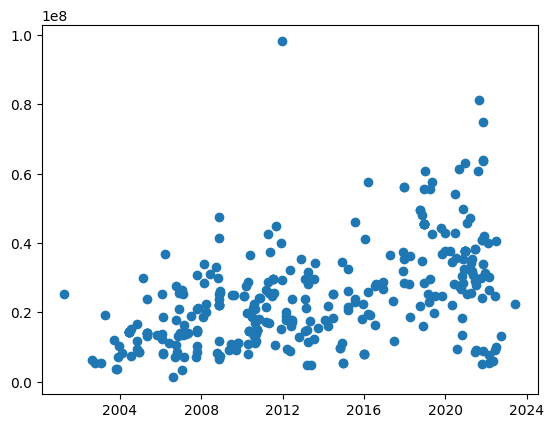

In [ ]:
plt.scatter(new_df['DATE FUNDED'], new_df['TDC'])
plt.show()

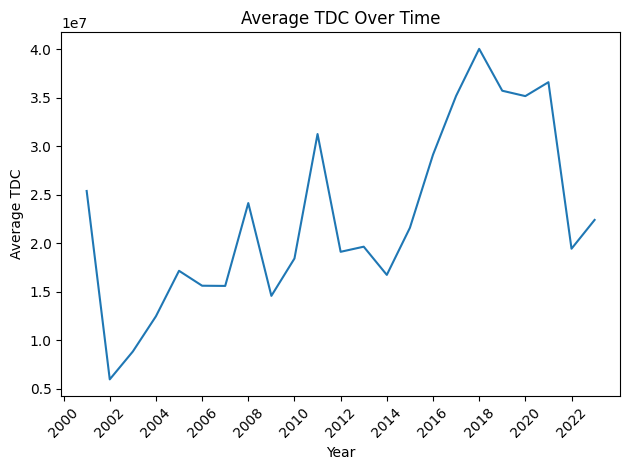

In [ ]:
average = line_df.groupby('DATE FUNDED')['TDC'].mean()
plt.plot(average.index, average.values)
plt.xlabel('Year')
plt.ylabel('Average TDC')
plt.title('Average TDC Over Time')
plt.xticks(rotation=45)
plt.xticks((np.arange(2000, 2024, 2)))
plt.tight_layout()
plt.show()


The scatter and line plot above both help us come to a better conclusion about the relation between Time and Development cost.

In the scatter plot we can see the big change is the range. As we get closer to current year the maximum cost of these projects continues to rise while the minimum stays at a similar level.
We can also see an outlier in 2012. The units for this project are also higher than average meaning this and the location could be the main factors of this development cost.

With the line plot the average Development cost is plotted for each year. Here we can see an overall increase with a lot of spikes and falls throughout. Notably at 2002 with the biggest fall seen and the biggest spike in cost being in 2018.

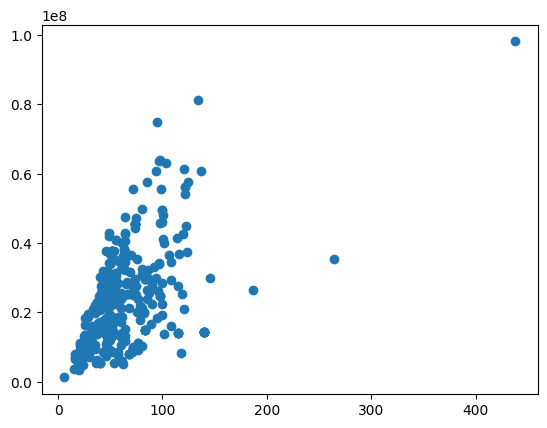

In [ ]:
plt.scatter(new_df['PROJECT TOTAL UNITS'], new_df['TDC'])
plt.show()

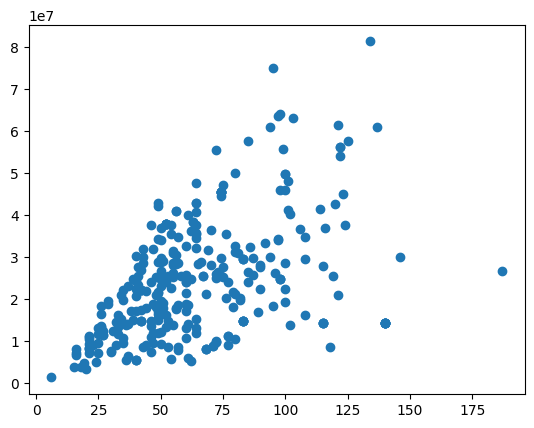

In [ ]:
outlier_df = new_df[new_df['PROJECT TOTAL UNITS'] < 200]
plt.scatter(outlier_df['PROJECT TOTAL UNITS'], outlier_df['TDC'])
plt.show()

Similar to previous graph there is a weak linear positive trend here. The maximum of the development cost increases at a higher rate than the minimum. There is a singular outlier and the cost shows for this particular project the the amount of units did not increase the cost exponentially.


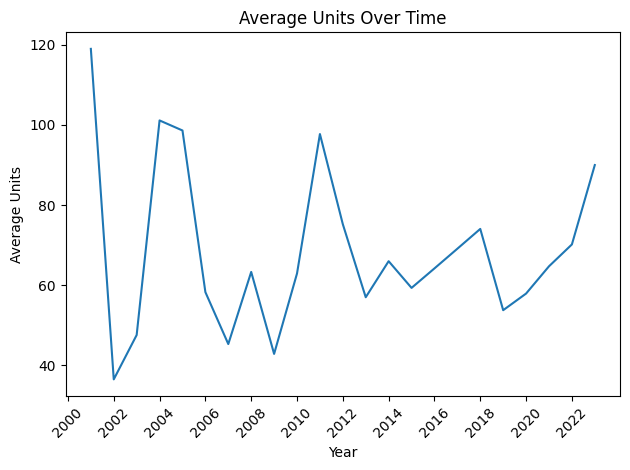

In [ ]:
average = line_df.groupby('DATE FUNDED')['PROJECT TOTAL UNITS'].mean()
plt.plot(average.index, average.values)
plt.xlabel('Year')
plt.ylabel('Average Units')
plt.title('Average Units Over Time')
plt.xticks(rotation=45)
plt.xticks((np.arange(2000, 2024, 2)))
plt.tight_layout()
plt.show()




There does not seem to be a trend on projects units over time with the datas various rises and falls. Once again there being a massive fall in 2002 coinciding with the first chart we can assume there just were not very many projects this year. With the opposite being the case in 2010. However for years like 2017 the average development cost is quite high however the the average units are in the middle compared to all other years so we can assume that the projects in this particular year were much more expensive due to other factors such as location and housing type.

After looking at the information we can conclude that the cost of LA housing projects has increased with time however not a consistent rate. We can confirm that the maximum of these projects has increased with time while the minimum tends to stay the same. The amount of units does not seem to influence the cost of the projects. There are some cases where the average units spikes and so does the cost like in 2011 but there are also cases and where the price spikes but the units slightly increases like in 2017. So we would have to look to other catergories like location to see if there is a trend.